In [1]:
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


## Exercise 1

In [6]:
#data from an experiment combining gas chromatography with a mass spectrometer
data=loadtxt('chromatogram_ion126.dat')

#first column = time after sample is injected into the column (minutes)
time=data[:,0]

#second column = intensity measured mass spectrometer (counts per minute)
intensity=data[:,1]

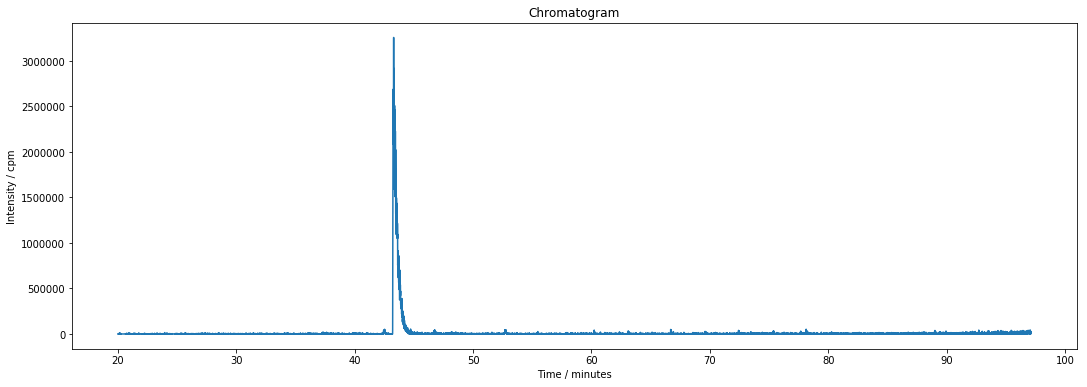

In [7]:
#plot the chromatogram
figure(figsize=(18,6))
plot(time,intensity)
title('Chromatogram')
xlabel('Time / minutes')
ylabel('Intensity / cpm')
show()

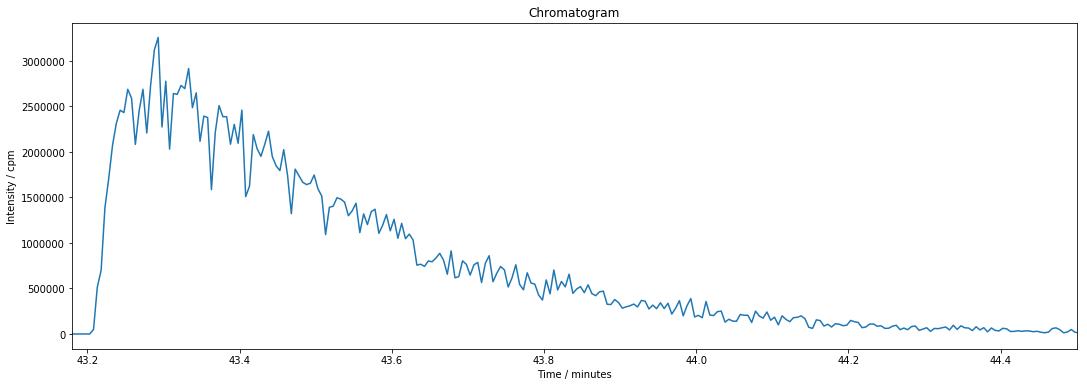

In [8]:
#plot zoomed in on the largest peak, when glycine reached the mass spectrometer
figure(figsize=(18,6))
plot(time,intensity)
title('Chromatogram')
xlabel('Time / minutes')
ylabel('Intensity / cpm')
xlim([43.18,44.5])
show()

In [9]:
#fit function to data
def gly_intensity(t,a,b,t0):
    "Fitting function allowing a fast rise and a slow exponential tail"
    x=(abs(t-t0)+(t-t0))/2.
    return a*x*e**(-x/b)

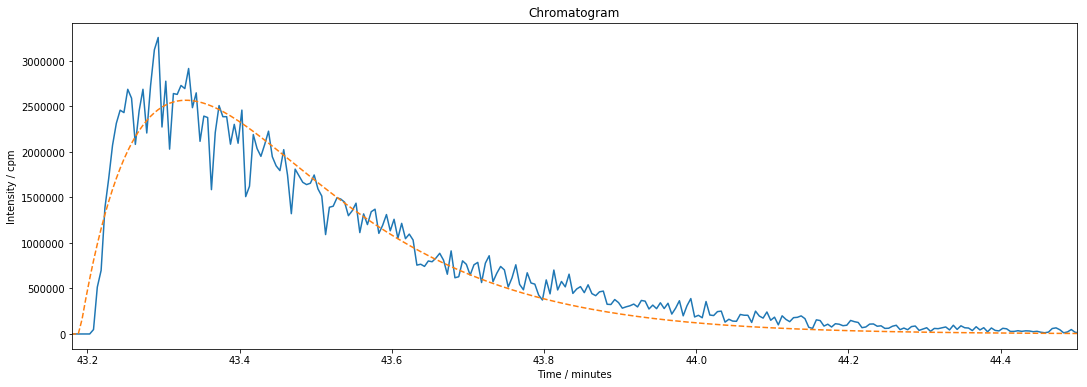

In [10]:
#plot the experimental data and the fitted curve
curve=curve_fit(gly_intensity,time,intensity,p0=[10,10,10],maxfev = 1000000000)
curve_params=curve[0]
curve_cov=curve[1]
fitted=gly_intensity(time,curve_params[0],curve_params[1],curve_params[2])

figure(figsize=(18,6))
plot(time,intensity)
plot(time,fitted,linestyle='--')

title('Chromatogram')
xlabel('Time / minutes')
ylabel('Intensity / cpm')
xlim([43.18,44.5])
show()

In [11]:
#determine the area under the peak, Area=a.b^2
A_gly=curve_params[0]*curve_params[1]**2
A_gly

975231.3188901404

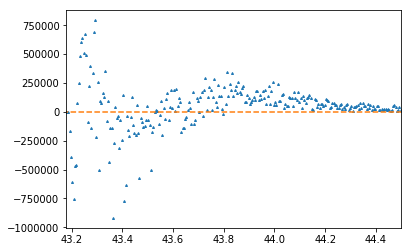

In [12]:
#plot residuals of fitted curve
residuals=intensity-fitted
plot(time,residuals,marker='^',linestyle='',markersize=2)
plot(array([time[0],time[-1]]),array([0,0]),linestyle='--')
xlim([43.18,44.5])
show()

Clear trend in residuals indicates that the model is not capturing all the structure of the data, hence could be improved

In [13]:
#calculate concentration of glycine in original sample (1 μl was injected)
vol_gly=1e-6
A_std=9.538e106
n_gly=(A_gly/A_std+7e-4)/8.33e4
conc_gly=n_gly/vol_gly
conc_gly

0.008403361344537815

## Exercise 2

In [14]:
#define python function for Gaussian curve, g1
def g1(x,a,s,x0):
    "Gaussian curve function"
    return a*e**(-((x-x0)**2)/(2*s**2))

In [15]:
#use g1 function to define function for sum of two Gaussian curves, g2
def g2(x,a,s,d):
    "Sum of two Gaussian curves"
    return a*((e**-(x+d)**2/2*s**2)+(e**-(x-d)**2/2*s**2))

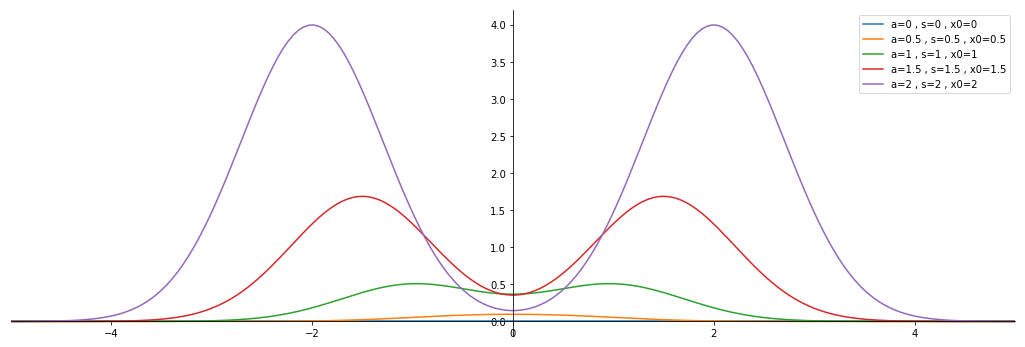

In [16]:
#produce several plots of g2 against x, use different values of parameters, identify effects of  parameters
x=linspace(-5,5,200)
figure(figsize=(18,6))
plot(x,g2(x,0,0,0),label="a=0 , s=0 , x0=0")
plot(x,g2(x,0.5,0.5,0.5),label="a=0.5 , s=0.5 , x0=0.5")
plot(x,g2(x,1,1,1),label="a=1 , s=1 , x0=1")
plot(x,g2(x,1.5,1.5,1.5),label="a=1.5 , s=1.5 , x0=1.5")
plot(x,g2(x,2,2,2),label="a=2 , s=2 , x0=2")
legend()
xlim([-5,5])
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(['data',0])
ax.spines['left'].set_position(['data',0])
show()

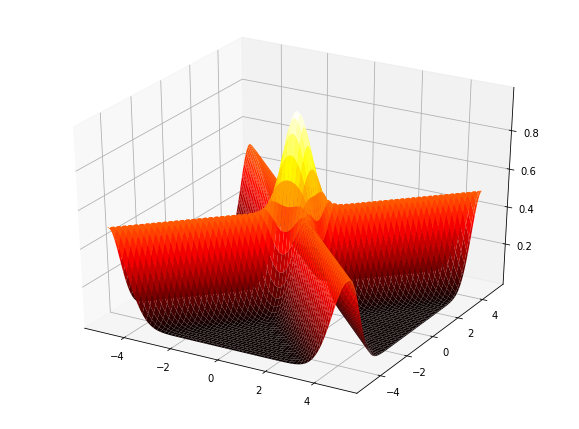

In [17]:
#3d plot/projected plot of g2 as a function of x and d simultaneously
from mpl_toolkits.mplot3d.axes3d import Axes3D
figure(figsize=(10,7.5))
x=linspace(-5,5,200)
d=linspace(-5,5,200)
mesh_data=meshgrid(x,d)
X_data = mesh_data[0]
Y_data = mesh_data[1]
Z_data = g2(X_data,1,1, Y_data)
ax = gca(projection='3d')
ax.plot_surface(X_data, Y_data, Z_data, rstride=3, cstride=3, cmap=cm.hot)
show()

## Exercise 3

In [18]:
#data for  emission spectrum of anthracene solution in cyclohexane
spec_data=loadtxt('anthracene_fluo.dat',skiprows=16)

#first column = wavelength of emitted light, unites = nm
wavelength=spec_data[:,0]

#second colum = intensity emitted light, arbitrary units
intensity=spec_data[:,1]

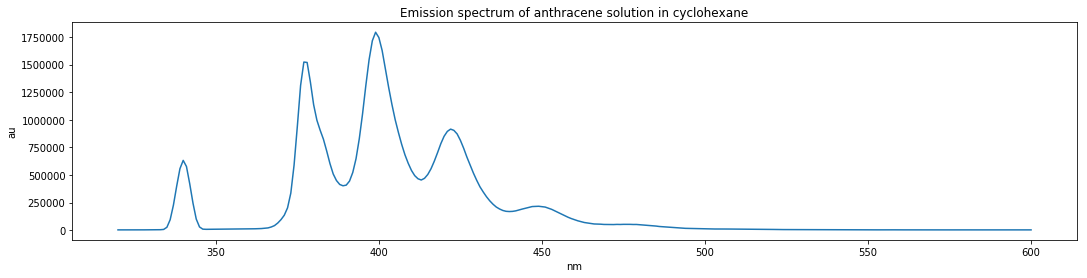

In [19]:
#plot the full spectrum
figure(figsize=(18,4))
plot(wavelength,intensity)
title('Emission spectrum of anthracene solution in cyclohexane')
xlabel('nm')
ylabel('au')
show()

In [68]:
#construct function that fits the spectrum
def spectrum(w,a,b,c,d,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v):
    "Emission spectrum of anthracene solution in cyclohexane"
    return (a*e**(-(w+c)**2/2*b**2))+(d*e**(-(w+g)**2/2*f**2))+(h*e**(-(w+j)**2/2*i**2))+(k*e**(-(w+m)**2/2*l**2))+(n*e**(-(w+p)**2/2*o**2))+(q*e**(-(w+s)**2/2*r**2))+(t*e**(-(w+v)**2/2*u**2))

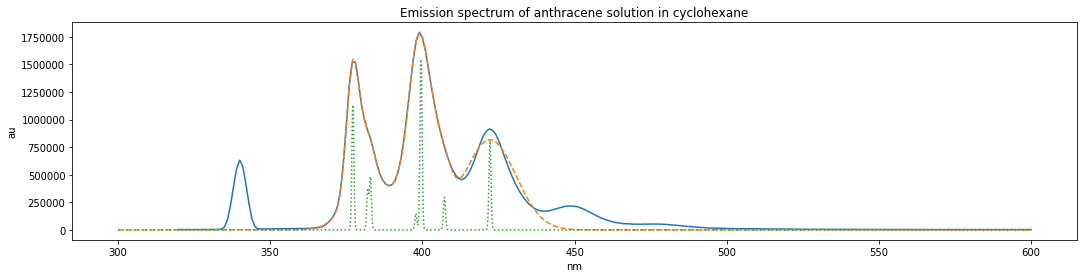

In [70]:
#plot both spectrum and fitted function together
figure(figsize=(18,4))
plot(wavelength,intensity)

w=linspace(300,600,1500)
from scipy.optimize import curve_fit
fit_spec=curve_fit(spectrum,wavelength,intensity,p0=[630000,1/2,-340,1500000,1/3,-377,720000,1/3,-384,1800000,1/5,-400,920000,1/8,-422,220000,1/8,-450,53000,1/7,-475],maxfev = 1000000000)
fit_spec_plot=spectrum(w, 1.51837557e+05,-5.18181823e-01,-3.97898252e+02,  3.49683985e+05,-4.60049403e-01,-3.82051032e+02,  1.17042239e+06,-4.76102485e-01,-3.77169111e+02,  4.79603982e+05,-1.41864874e-01,-3.82945074e+02, 2.95910530e+05,3.97955675e-01,-4.07282066e+02,  8.17632453e+05,-1.17870714e-01,-4.22230771e+02,  1.61333592e+06,-2.39705952e-01,-3.99564169e+02)
plot(w,fit_spec_plot, linestyle='--')

#add plots of the individual peaks that form the spectrum
plot(w,spectrum(w, 1.51837557e+05,3,-3.97898252e+02,  3.49683985e+05,3,-3.82051032e+02,  1.17042239e+06,3,-3.77169111e+02,  4.79603982e+05,3,-3.82945074e+02, 2.95910530e+05,3,-4.07282066e+02,  8.17632453e+05,3,-4.22230771e+02,  1.61333592e+06,3,-3.99564169e+02), linestyle=':')

title('Emission spectrum of anthracene solution in cyclohexane')
xlabel('nm')
ylabel('au')
show()

In [78]:
fit_spec[0]

array([ 6.37007242e+05,  4.75526154e-01, -3.40059448e+02,  8.23545011e+05,
        5.43181521e-01, -3.76998272e+02,  9.24312381e+05,  2.08509636e-01,
       -3.80501309e+02,  1.69527107e+06,  1.98653069e-01, -3.99726673e+02,
        8.56009128e+05,  1.34463600e-01, -4.21861480e+02,  1.95783388e+05,
        1.34479071e-01, -4.48011733e+02,  5.13592445e+04,  5.62812881e-02,
       -4.71326673e+02])

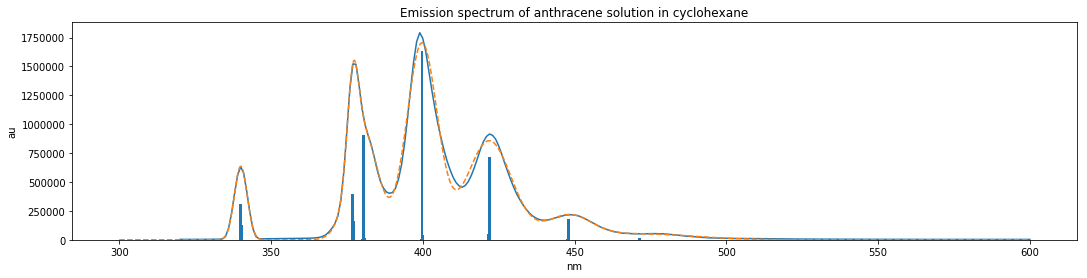

In [92]:
#plot both spectrum and fitted function together
figure(figsize=(18,4))
plot(wavelength,intensity)

w=linspace(300,600,1000)
fit_spec=curve_fit(spectrum,wavelength,intensity,p0=[630000,1/2,-340,1500000,1/3,-377,720000,1/3,-384,1800000,1/5,-400,920000,1/8,-422,220000,1/8,-450,53000,1/7,-475],maxfev = 1000000000)
plot(w,spectrum(w,6.37007242e+05,  4.75526154e-01, -3.40059448e+02,  
                8.23545011e+05, 5.43181521e-01, -3.76998272e+02,  
                9.24312381e+05,  2.08509636e-01, -3.80501309e+02,  
                1.69527107e+06,  1.98653069e-01, -3.99726673e+02,
                8.56009128e+05,  1.34463600e-01, -4.21861480e+02,  
                1.95783388e+05, 1.34479071e-01, -4.48011733e+02,  
                5.13592445e+04,  5.62812881e-02, -4.71326673e+02), linestyle='--')

#add plots of the individual peaks that form the spectrum
bar(w,spectrum(w,6.37007242e+05,  10, -3.40059448e+02,  
                8.23545011e+05, 10, -3.76998272e+02,  
                9.24312381e+05,  10, -3.80501309e+02,  
                1.69527107e+06,  10, -3.99726673e+02,
                8.56009128e+05,  10, -4.21861480e+02,  
                1.95783388e+05, 10, -4.48011733e+02,  
                5.13592445e+04,  10, -4.71326673e+02))

title('Emission spectrum of anthracene solution in cyclohexane')
xlabel('nm')
ylabel('au')
show()

In [88]:
bar?

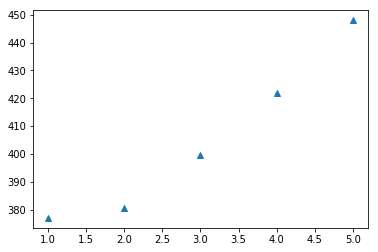

In [85]:
#plot wavelength (centre of each peak) against peak number (counting from lower wavelengths) and comment
peak_number=array([1,2,3,4,5])
wavelength_centre=array([-3.76998272e+02,-3.80501309e+02,-3.99726673e+02,-4.21861480e+02,-4.48011733e+02])
plot(peak_number,-1*wavelength_centre,marker='^',linestyle='')
show()

The peaks get exponentially further away from each other